In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
# from utils import *
%run utils-2D.py
plt.rcParams['text.usetex'] = True 

In [2]:

init_params={
    'v' : 2,                    # Wave speed
    'theta_resolution' : 1,     # degrees
    'tolerance' : 0.05,         # Detection threshold
    'r_s' :     50,                # r of source
    'theta_s' : np.deg2rad(60) ,      # theta of source
    'd': 20,       #rescale with r_s*     # radially symmetric receptor positions
    'r1_amp':15,                 # amplitude of outR1
    'r2_amp':15,                  # amplitude of outR2
    'r1_theta': 0,
    'r2_theta': np.pi,
    }
init_params.update({'R1cart':polar2cart(init_params['d'], init_params['r1_theta']),
                    'R2cart':polar2cart(-init_params['d'], init_params['r2_theta']),
                    'Scart': polar2cart(init_params['r_s'],init_params['r_s'] ),
                    })

time_prms = {
    'dt' : 0.001,                # Time step
    'tmax' : 100,              # Simulation duration
    'pulses' : 10,               # Period between source emissions
    'width' : 100,               # time width of pulse window
}
INeuron={
    'V0': -70,
    'Vq': -55,
    'w1': 5,
    'w2':5, 
    'tau':1,
    'rf': 10,
    'lag':300,
    'outAmp':20,
    'I1': 'outR1',
    'I2': 'outR2'
}
O1Neuron = {
    'id': 'O1',
    'V0': -70,
    'Vq': -55,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'lag':500,
    'I1': 'outR1',
    'I2': 'outI',
    'outAmp': 20
    }
O2Neuron = {
    'id': 'O2',
    'V0': -70,
    'Vq': -55,
    'w1': .8,
    'w2': .8,
    'tau': 1, 
    'refr':300,
    't0': 0, 
    'tf': 10,
    'lag':500,
    'I1': 'outR2',
    'I2': 'outI',
    'outAmp': 20
    }

In [5]:
%run utils-2D.py
time = np.arange(0, time_prms['tmax'], time_prms['dt'])
emissionIdx, outS, startIdx = Source(time, time_prms)
# df = pd.DataFrame({'time':time,
#                     'S': outS,
#                     # 'outR1': np.zeros_like[time],
#                     # 'outR2': np.zeros_like[time],
#                     # 'outI':  np.zeros_like[time],
#                     # 'outO1': np.zeros_like[time], 
#                     # 'outO2': np.zeros_like[time]
#                     })

df0 = pd.DataFrame()
Vdf0 = pd.DataFrame()

# for i, t in enumerate(tqdm(startIdx[:-1])): 
#     stopIdx = startIdx[i+1]
#     newtime = time[t:stopIdx]
#     outS_new = outS[i: stopIdx]
#     indices = np.where(outS_new == 1)[0]
#     for nt in tqdm(newtime):
#         df_nt, Vdf_nt = FindSource(newtime, newtime[indices],outS, 
#                                 init_params,time_prms, 
#                                 INeuron, O1Neuron, O2Neuron)
#         df0 = pd.concat([df0,df_nt,], axis=0)
#         Vdf0 = pd.concat([Vdf0, Vdf_nt], axis=0)
# # update the dataframe sequentially going through each pulse.   

for i, t in enumerate(tqdm(startIdx[:-1])): 
    stopIdx = startIdx[i+1]
    newtime = time[t:stopIdx]
    outS_new = outS[t:stopIdx]
    emission_times = newtime[np.where(outS_new == 1)]
    
    # CALL FindSource ONCE PER PULSE
    df_nt, Vdf_nt = FindSource(newtime, emission_times, outS_new, 
                                init_params, time_prms, 
                                INeuron, O1Neuron, O2Neuron)
    
    df0 = pd.concat([df0, df_nt], axis=0)
    Vdf0 = pd.concat([Vdf0, Vdf_nt], axis=0)


  0%|          | 0/9 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


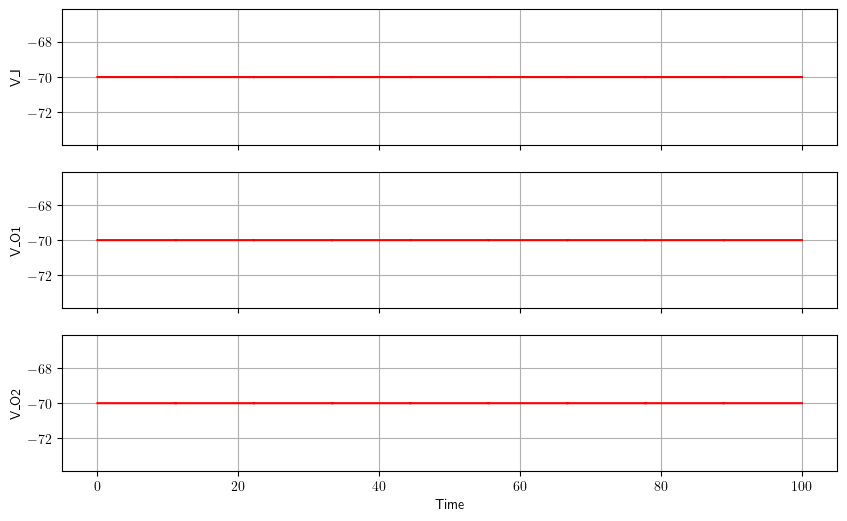

In [11]:
%run utils-2D.py
dfPlot(Vdf0)

In [7]:
startIdx

[0, 11110, 22221, 33333, 44443, 55554, 66666, 77776, 88887, 99999]